In [ ]:
'''Main file for final project for CS653 Data Mining.'''

__author__ = ['Reina Hastings', 'Trevor Mugoya', 'Surangi Jayasinghe']
__email__ = ['reinahastings13@gmail.com', 'tmugoya@sdsu.edu', 'sjayasinghe@sdsu.edu']

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score
import tensorflow as tf
from tensorflow import keras
# DBSCAN Libraries---------------
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import random
import plotly.express as px
import itertools
from sklearn.metrics import silhouette_score as shs
# ----------------------------------

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# variable information
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch the dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# Inspect the variables DataFrame
variables = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables
print(variables)

# Get the feature names by selecting rows where the role is 'Feature'
feature_names = variables[variables['role'] == 'Feature']['name'].tolist()

# Get the target name by selecting the row where the role is 'Target'
target_name = variables[variables['role'] == 'Target']['name'].iloc[0]

# Get features and targets
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# Convert to DataFrame for features and target
df_features = pd.DataFrame(X, columns=feature_names)
df_target = pd.DataFrame(y, columns=[target_name])

# Combine features and target into a single DataFrame
df = pd.concat([df_features, df_target], axis=1)

# Display the first few rows of the combined DataFrame
print(df.head())


                              name     role         type demographic  \
0                           Gender  Feature  Categorical      Gender   
1                              Age  Feature   Continuous         Age   
2                           Height  Feature   Continuous        None   
3                           Weight  Feature   Continuous        None   
4   family_history_with_overweight  Feature       Binary        None   
5                             FAVC  Feature       Binary        None   
6                             FCVC  Feature      Integer        None   
7                              NCP  Feature   Continuous        None   
8                             CAEC  Feature  Categorical        None   
9                            SMOKE  Feature       Binary        None   
10                            CH2O  Feature   Continuous        None   
11                             SCC  Feature       Binary        None   
12                             FAF  Feature   Continuous        

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


<Axes: >

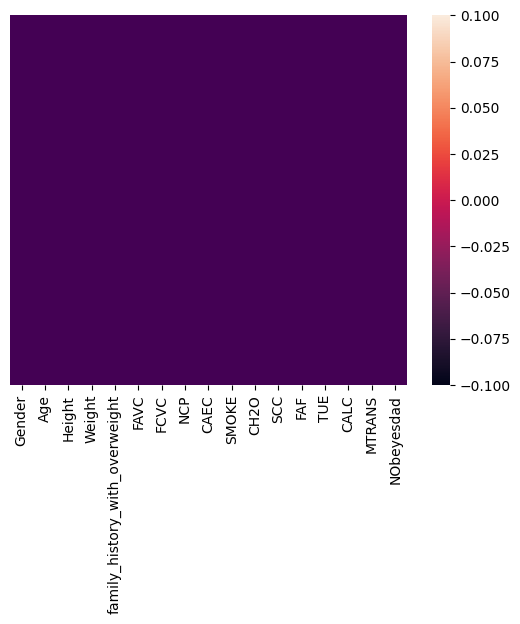

In [ ]:
## clean the data, checking for Nas. Did not see any
sns.heatmap(df.isnull())
# visualize NAs in heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
# Print column names to check for 'NObesity'
print(df.columns)

# If the target variable has a different name, rename it
df.rename(columns={'obesity_level': 'NObesity'}, inplace=True)

# Check again after renaming
print(df.columns)

# Now you can continue with the analysis


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


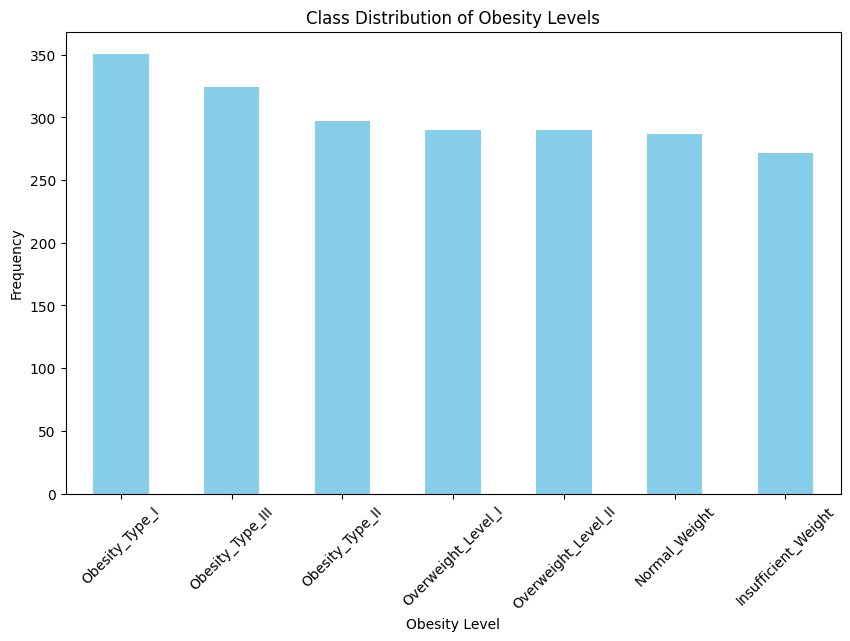

In [ ]:
# Check class distribution of 'NObeyesdad' (Obesity Level)
plt.figure(figsize=(10,6))
df['NObeyesdad'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Separate features (X) and target (y)
X = df.drop('NObeyesdad', axis=1)  # Drop the target column from features
y = df['NObeyesdad']  # Use 'NObeyesdad' as the target variable


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import f1_score


# One-hot encode categorical features (if needed)
X = pd.get_dummies(X, drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"F1 Macro: {f1_macro}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9258675078864353
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.93      0.94        86
      Normal_Weight       0.78      0.89      0.83        93
     Obesity_Type_I       0.97      0.93      0.95       102
    Obesity_Type_II       0.97      0.99      0.98        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.89      0.84      0.87        88
Overweight_Level_II       0.95      0.90      0.92        79

           accuracy                           0.93       634
          macro avg       0.93      0.92      0.93       634
       weighted avg       0.93      0.93      0.93       634

F1 Macro: 0.9258787647784262


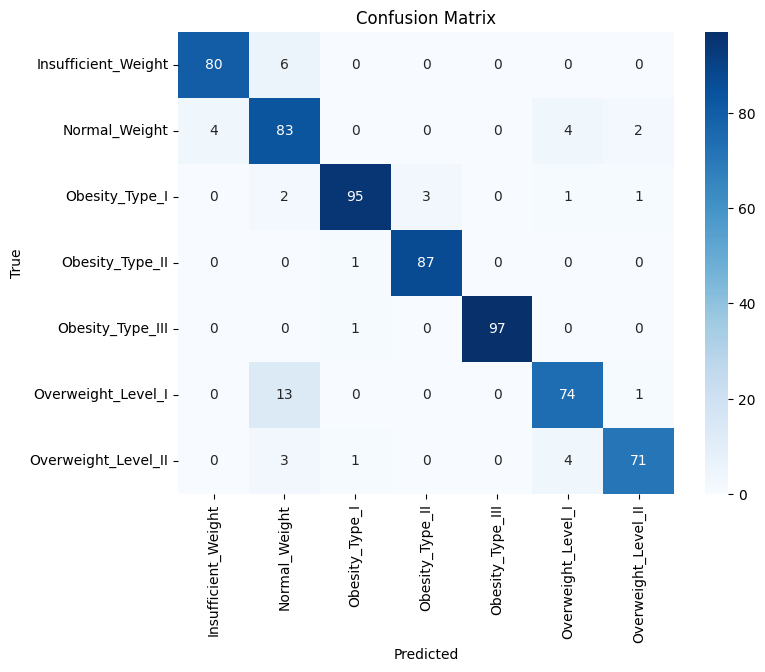

In [ ]:
# prompt: generate a confusion matrix for random forest model above

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

random forest with cross validation

Cross-validated Accuracy: 0.9295 ± 0.1066
Average Accuracy (Cross-validation): 0.9295
Average F1 Macro Score (Cross-validation): 0.9296


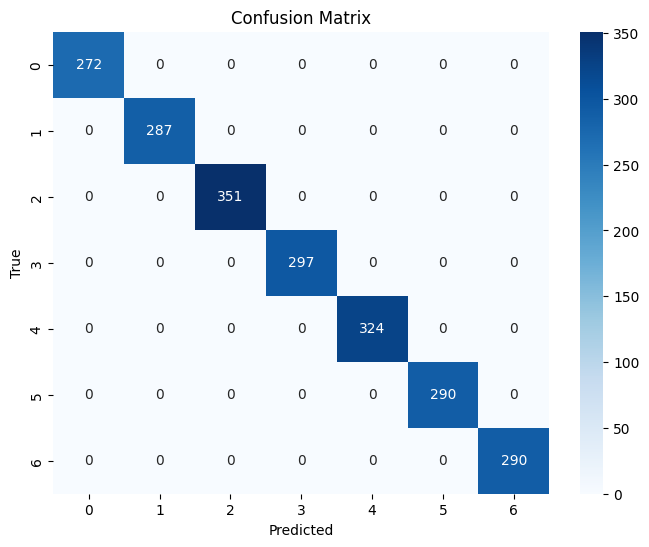


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       1.00      1.00      1.00       287
           2       1.00      1.00      1.00       351
           3       1.00      1.00      1.00       297
           4       1.00      1.00      1.00       324
           5       1.00      1.00      1.00       290
           6       1.00      1.00      1.00       290

    accuracy                           1.00      2111
   macro avg       1.00      1.00      1.00      2111
weighted avg       1.00      1.00      1.00      2111

F1 Macro: 1.0000


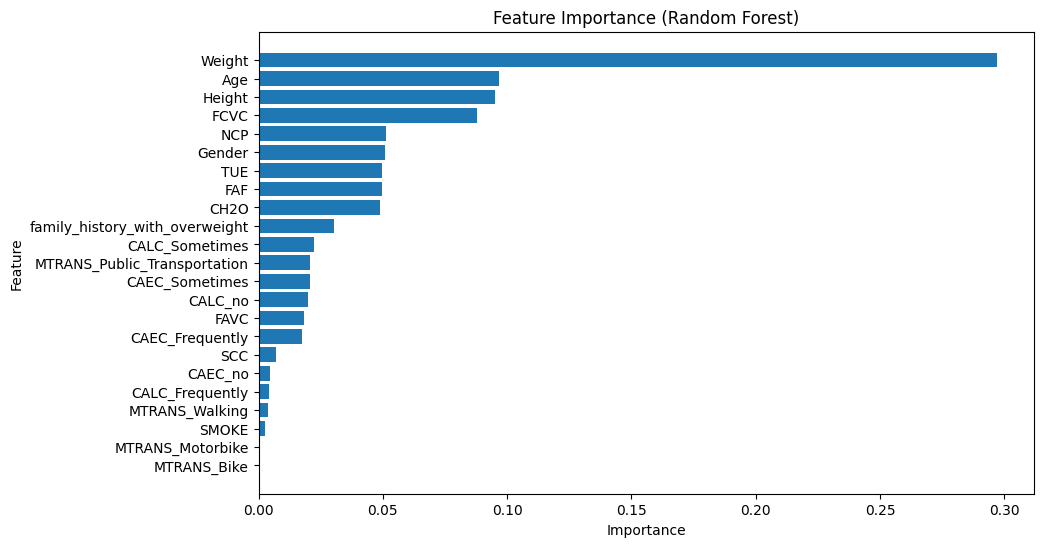

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame

# --- Preprocessing ---
# Separate features (X) and target (y)
X = df.drop('NObeyesdad', axis=1)  # Drop the target column
y = df['NObeyesdad']  # Target variable

# Label encode the target variable (convert string labels to numeric)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode categorical features (if necessary)
X = pd.get_dummies(X, drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Cross-Validation ---
# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation for accuracy
accuracy_scores = cross_val_score(model, X_scaled, y_encoded, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {accuracy_scores.mean():.4f} ± {accuracy_scores.std():.4f}")

# Perform cross-validation for multiple metrics (F1 macro, accuracy, etc.)
cv_results = cross_validate(model, X_scaled, y_encoded, cv=5, scoring=['accuracy', 'f1_macro'], return_train_score=False)

# --- Evaluating Cross-Validation Results ---
print(f"Average Accuracy (Cross-validation): {cv_results['test_accuracy'].mean():.4f}")
print(f"Average F1 Macro Score (Cross-validation): {cv_results['test_f1_macro'].mean():.4f}")

# Train the model on the full training data (this can be done after cross-validation)
model.fit(X_scaled, y_encoded)

# Make predictions on the whole dataset (or test set, if available)
y_pred = model.predict(X_scaled)

# --- Confusion Matrix ---
cm = confusion_matrix(y_encoded, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# --- Classification Report ---
# Convert integer labels back to their original string labels
target_names = label_encoder.inverse_transform(range(len(label_encoder.classes_))).astype(str)

print("\nClassification Report:")
print(classification_report(y_encoded, y_pred, target_names=target_names))

# --- F1 Macro Score ---
f1_macro = f1_score(y_encoded, y_pred, average='macro')
print(f"F1 Macro: {f1_macro:.4f}")

# --- Feature Importance ---
# Get feature importances from the trained model
importance_values = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_values})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

Cross-validated Accuracy: 0.9295 ± 0.1066
Average Accuracy (Cross-validation): 0.9295
Average F1 Macro Score (Cross-validation): 0.9296


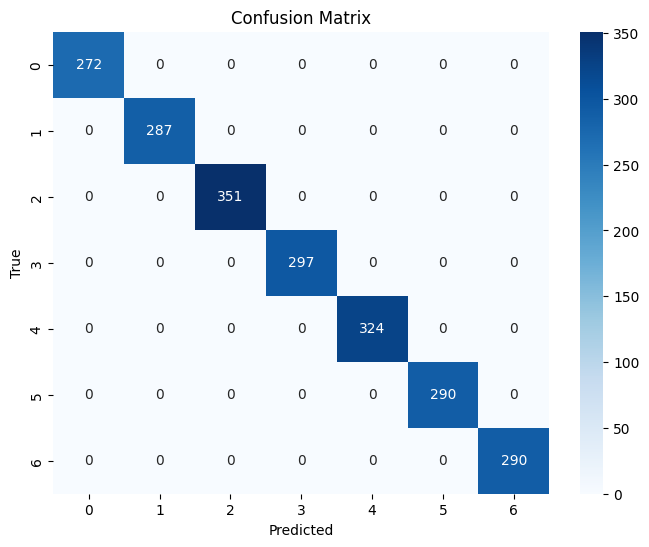


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       1.00      1.00      1.00       287
           2       1.00      1.00      1.00       351
           3       1.00      1.00      1.00       297
           4       1.00      1.00      1.00       324
           5       1.00      1.00      1.00       290
           6       1.00      1.00      1.00       290

    accuracy                           1.00      2111
   macro avg       1.00      1.00      1.00      2111
weighted avg       1.00      1.00      1.00      2111

F1 Macro: 1.0000


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame

# --- Preprocessing ---
# Separate features (X) and target (y)
X = df.drop('NObeyesdad', axis=1)  # Drop the target column
y = df['NObeyesdad']  # Target variable

# Label encode the target variable (convert string labels to numeric)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode categorical features (if necessary)
X = pd.get_dummies(X, drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Cross-Validation ---
# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation for accuracy
accuracy_scores = cross_val_score(model, X_scaled, y_encoded, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {accuracy_scores.mean():.4f} ± {accuracy_scores.std():.4f}")

# Perform cross-validation for multiple metrics (F1 macro, accuracy, etc.)
cv_results = cross_validate(model, X_scaled, y_encoded, cv=5, scoring=['accuracy', 'f1_macro'], return_train_score=False)

# --- Evaluating Cross-Validation Results ---
print(f"Average Accuracy (Cross-validation): {cv_results['test_accuracy'].mean():.4f}")
print(f"Average F1 Macro Score (Cross-validation): {cv_results['test_f1_macro'].mean():.4f}")

# Train the model on the full training data (this can be done after cross-validation)
model.fit(X_scaled, y_encoded)

# Make predictions on the whole dataset (or test set, if available)
y_pred = model.predict(X_scaled)

# --- Confusion Matrix ---
cm = confusion_matrix(y_encoded, y_pred)

# Plot confusion matrix with feature names
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# --- Classification Report ---
# Convert integer labels back to their original string labels
target_names = label_encoder.inverse_transform(range(len(label_encoder.classes_))).astype(str)

print("\nClassification Report:")
print(classification_report(y_encoded, y_pred, target_names=target_names))

# --- F1 Macro Score ---
f1_macro = f1_score(y_encoded, y_pred, average='macro')
print(f"F1 Macro: {f1_macro:.4f}")

XGBOOSTING  For a multi-class classification problem, used multi:softmax as the objective function.

In [ ]:
pip install xgboost


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Separate features (X) and target (y)
X = df.drop('NObeyesdad', axis=1)  # Drop the target column
y = df['NObeyesdad']  # Target variable

# One-hot encode categorical features (if necessary)
X = pd.get_dummies(X, drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Accuracy: 0.9527
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      1.00      0.97        56
      Normal_Weight       0.95      0.84      0.89        62
     Obesity_Type_I       0.97      0.96      0.97        78
    Obesity_Type_II       0.97      0.97      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.85      0.95      0.90        56
Overweight_Level_II       1.00      0.96      0.98        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423



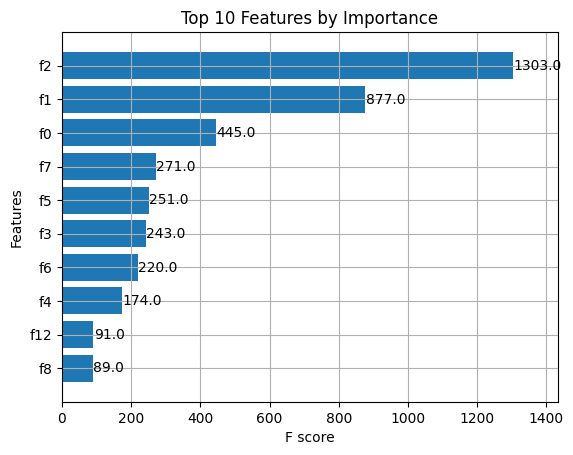

In [ ]:
#import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded as df

# Separate features (X) and target (y)
X = df.drop('NObeyesdad', axis=1)  # Drop the target column
y = df['NObeyesdad']  # Target variable

# Label encode the target variable (convert string labels to numeric)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # This converts the labels into integers

# One-hot encode categorical features (if necessary)
X = pd.get_dummies(X, drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',  # multi-class classification
    num_class=len(label_encoder.classes_),  # Number of unique classes in the target variable
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Optional: Plot feature importance
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10, height=0.8)
plt.title('Top 10 Features by Importance')
plt.show()



Accuracy: 0.9527
F1 Macro Score: 0.9522
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      1.00      0.97        56
      Normal_Weight       0.95      0.84      0.89        62
     Obesity_Type_I       0.97      0.96      0.97        78
    Obesity_Type_II       0.97      0.97      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.85      0.95      0.90        56
Overweight_Level_II       1.00      0.96      0.98        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423



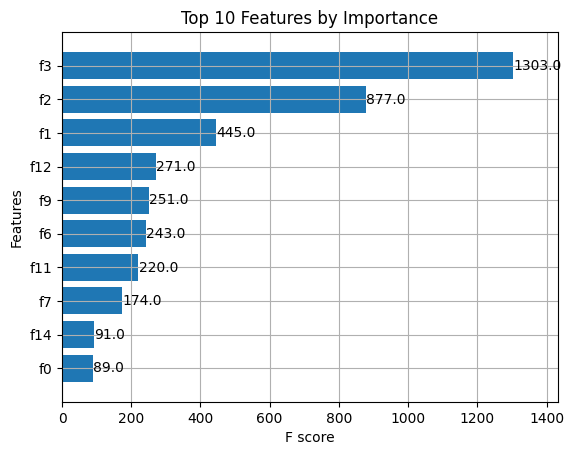

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded as df

# Separate features (X) and target (y)
X = df.drop('NObeyesdad', axis=1)  # Drop the target column
y = df['NObeyesdad']  # Target variable

# Label encode the target variable (convert string labels to numeric)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # This converts the labels into integers

# One-hot encode categorical features (if necessary)
X = pd.get_dummies(X, drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',  # multi-class classification
    num_class=len(label_encoder.classes_),  # Number of unique classes in the target variable
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# F1 Score (Macro average)
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"F1 Macro Score: {f1_macro:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Optional: Plot feature importance
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10, height=0.8)
plt.title('Top 10 Features by Importance')
plt.show()


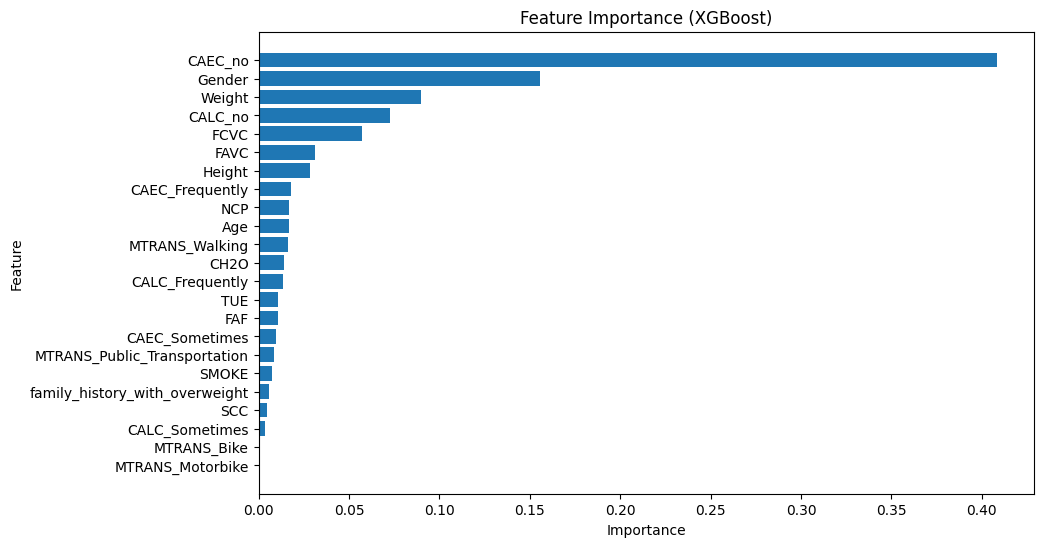

In [ ]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is already loaded as df

# Step 1: Preprocess the data
# Separate features (X) and target (y)
X = df.drop('NObeyesdad', axis=1)  # Drop the target column
y = df['NObeyesdad']  # Target variable

# Label encode the target variable (convert string labels to numeric)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # This converts the labels into integers

# One-hot encode categorical features (if necessary)
X = pd.get_dummies(X, drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',  # multi-class classification
    num_class=len(label_encoder.classes_),  # Number of unique classes in the target variable
    random_state=42
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Step 3: Plot feature importance
# Get feature importances
importance_values = xgb_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_values})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (XGBoost)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


F1 Macro Score (Average across folds): 0.9687
F1 Macro Score (Standard Deviation across folds): 0.0035
Accuracy (Average across folds): 0.9692
Accuracy (Standard Deviation across folds): 0.0034

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       1.00      1.00      1.00       287
           2       1.00      1.00      1.00       351
           3       1.00      1.00      1.00       297
           4       1.00      1.00      1.00       324
           5       1.00      1.00      1.00       290
           6       1.00      1.00      1.00       290

    accuracy                           1.00      2111
   macro avg       1.00      1.00      1.00      2111
weighted avg       1.00      1.00      1.00      2111



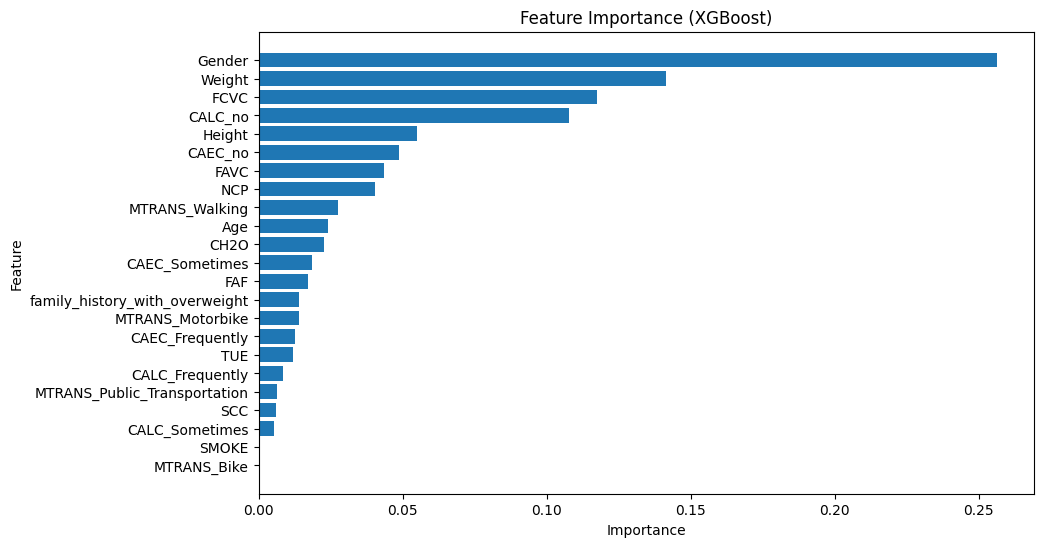

In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Step 1: Preprocess the data
# Separate features (X) and target (y)
X = df.drop('NObeyesdad', axis=1)  # Drop the target column
y = df['NObeyesdad']  # Target variable

# Label encode the target variable (convert string labels to numeric)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # This converts the labels into integers

# One-hot encode categorical features (if necessary)
X = pd.get_dummies(X, drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Cross-validation setup
# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',  # multi-class classification
    num_class=len(label_encoder.classes_),  # Number of unique classes in the target variable
    random_state=42
)

# Set up cross-validation (Stratified K-Fold ensures equal class distribution in each fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 3: Perform cross-validation and calculate metrics
# Perform cross-validation to get F1 scores for each fold (Macro average)
cv_f1_scores = cross_val_score(xgb_model, X_scaled, y_encoded, cv=cv, scoring='f1_macro')
print(f"F1 Macro Score (Average across folds): {cv_f1_scores.mean():.4f}")
print(f"F1 Macro Score (Standard Deviation across folds): {cv_f1_scores.std():.4f}")

# Perform cross-validation to get accuracy for each fold
cv_accuracy_scores = cross_val_score(xgb_model, X_scaled, y_encoded, cv=cv, scoring='accuracy')
print(f"Accuracy (Average across folds): {cv_accuracy_scores.mean():.4f}")
print(f"Accuracy (Standard Deviation across folds): {cv_accuracy_scores.std():.4f}")

# Step 4: Train the model on the full training set and make predictions on the test set
xgb_model.fit(X_scaled, y_encoded)

# Make predictions on the entire dataset (or test set if preferred)
y_pred = xgb_model.predict(X_scaled)

# Final evaluation on the full dataset
# Get the class names as strings
target_names = label_encoder.inverse_transform(range(len(label_encoder.classes_))).astype(str)

print("\nClassification Report:")
print(classification_report(y_encoded, y_pred, target_names=target_names))

# Step 5: Plot feature importance with actual feature names
# Get feature importances
importance_values = xgb_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_values})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (XGBoost)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


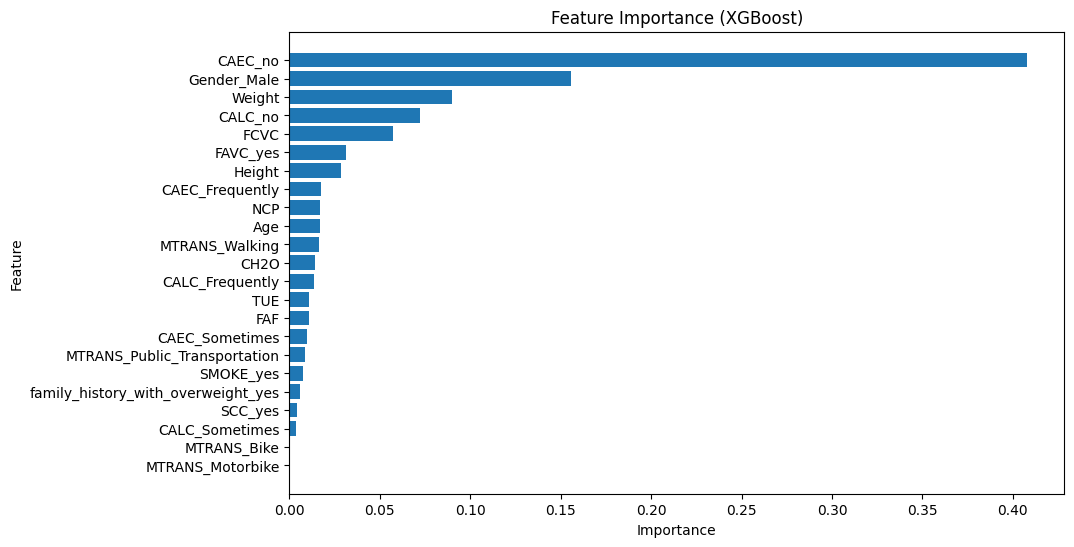

In [ ]:
# prompt: plot feature importance with actual feature names

# import matplotlib.pyplot as plt
# import xgboost as xgb
# from sklearn.preprocessing import LabelEncoder

# Assuming xgb_model and feature names are defined as in your previous code
# ... your existing code ...

# Get feature importances
importance_values = xgb_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_values})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (XGBoost)')
plt.gca().invert_yaxis() # Invert y-axis for better readability
plt.show()

F1 Macro Score (Average across folds): 0.9687
F1 Macro Score (Standard Deviation across folds): 0.0035
Accuracy (Average across folds): 0.9692
Accuracy (Standard Deviation across folds): 0.0034

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       1.00      1.00      1.00       287
           2       1.00      1.00      1.00       351
           3       1.00      1.00      1.00       297
           4       1.00      1.00      1.00       324
           5       1.00      1.00      1.00       290
           6       1.00      1.00      1.00       290

    accuracy                           1.00      2111
   macro avg       1.00      1.00      1.00      2111
weighted avg       1.00      1.00      1.00      2111



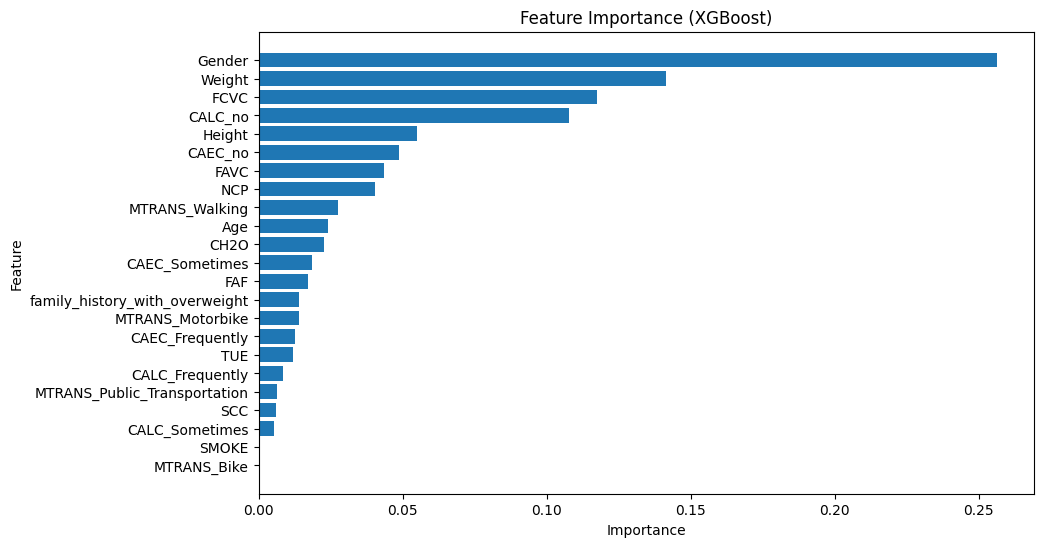

In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded as df

# Step 1: Preprocess the data
# Separate features (X) and target (y)
X = df.drop('NObeyesdad', axis=1)  # Drop the target column
y = df['NObeyesdad']  # Target variable

# Label encode the target variable (convert string labels to numeric)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # This converts the labels into integers

# One-hot encode categorical features (if necessary)
X = pd.get_dummies(X, drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Cross-validation setup
# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',  # multi-class classification
    num_class=len(label_encoder.classes_),  # Number of unique classes in the target variable
    random_state=42
)

# Set up cross-validation (Stratified K-Fold ensures equal class distribution in each fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 3: Perform cross-validation and calculate metrics
# Perform cross-validation to get F1 scores for each fold (Macro average)
cv_f1_scores = cross_val_score(xgb_model, X_scaled, y_encoded, cv=cv, scoring='f1_macro')
print(f"F1 Macro Score (Average across folds): {cv_f1_scores.mean():.4f}")
print(f"F1 Macro Score (Standard Deviation across folds): {cv_f1_scores.std():.4f}")

# Perform cross-validation to get accuracy for each fold
cv_accuracy_scores = cross_val_score(xgb_model, X_scaled, y_encoded, cv=cv, scoring='accuracy')
print(f"Accuracy (Average across folds): {cv_accuracy_scores.mean():.4f}")
print(f"Accuracy (Standard Deviation across folds): {cv_accuracy_scores.std():.4f}")

# Step 4: Train the model on the full training set and make predictions on the test set
xgb_model.fit(X_scaled, y_encoded)

# Make predictions on the entire dataset (or test set if preferred)
y_pred = xgb_model.predict(X_scaled)

# Final evaluation on the full dataset
# Get the class names as strings
target_names = label_encoder.inverse_transform(range(len(label_encoder.classes_))).astype(str)

print("\nClassification Report:")
print(classification_report(y_encoded, y_pred, target_names=target_names))

# Step 5: Plot feature importance with actual feature names
# Get feature importances
importance_values = xgb_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_values})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (XGBoost)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [ ]:
import pandas as pd

# Assuming df is your DataFrame (replace with your actual DataFrame)
# Example: df = pd.read_csv('your_data.csv')

# Check the first few rows of the DataFrame
print(df.head())

# Check the data types of each column to ensure there are no non-numeric columns for correlation
print(df.dtypes)


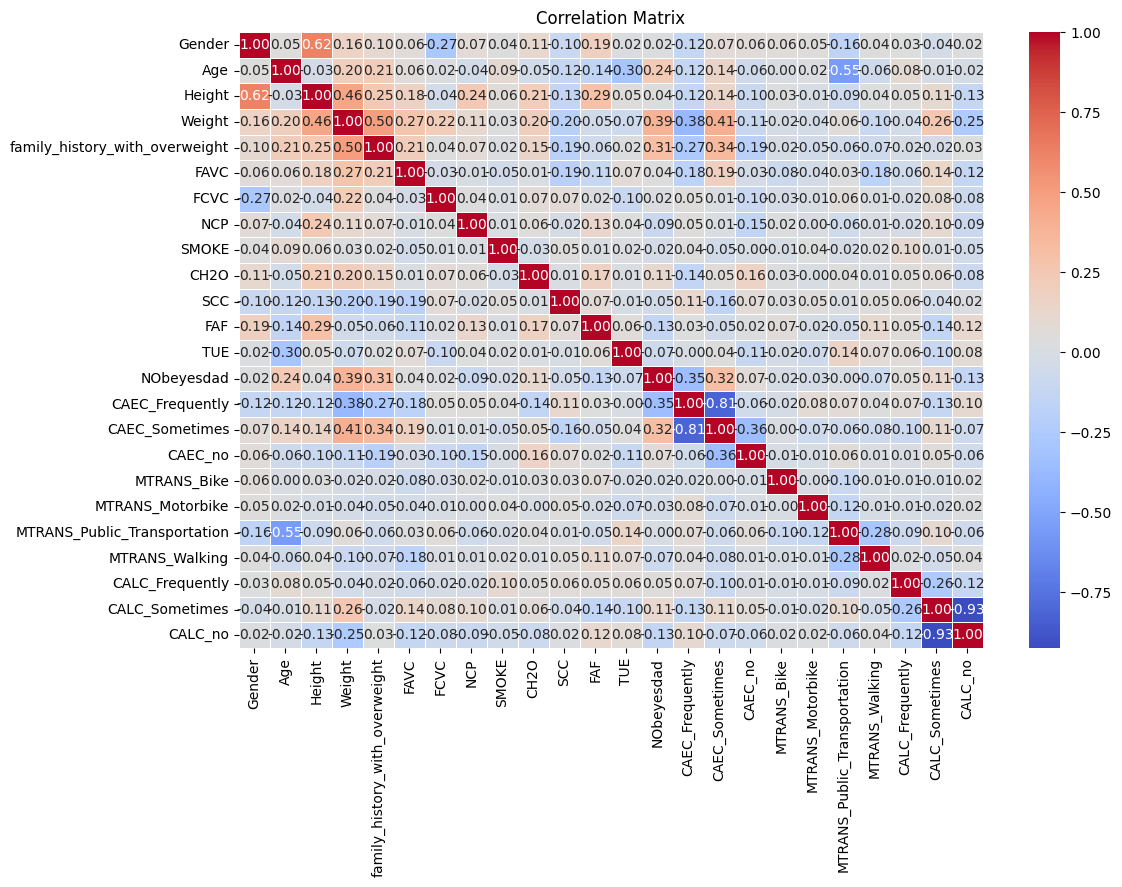

In [ ]:
# --- Step 1: Encode categorical variables ---
# Binary columns: Label encode these (Gender, family_history_with_overweight, FAVC, SMOKE, SCC)
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
label_encoder = LabelEncoder()

for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding for non-ordinal categorical columns (CAEC, MTRANS, CALC)
df_encoded = pd.get_dummies(df, columns=['CAEC', 'MTRANS', 'CALC'], drop_first=True)

# --- Step 2: Encode the target column `NObeyesdad` ---
df_encoded['NObeyesdad'] = label_encoder.fit_transform(df_encoded['NObeyesdad'])

# --- Step 3: Compute the correlation matrix ---
# Calculate the correlation matrix only on numeric columns
corr_matrix = df_encoded.corr()

# --- Step 4: Visualize the correlation matrix ---
# Set up the matplotlib figure (optional: adjust the figure size)
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)

# Add title and display the plot
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7069

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        56
           1       0.74      0.42      0.54        62
           2       0.65      0.60      0.63        78
           3       0.80      0.97      0.88        58
           4       0.94      1.00      0.97        63
           5       0.53      0.59      0.56        56
           6       0.45      0.44      0.44        50

    accuracy                           0.71       423
   macro avg       0.70      0.71      0.69       423
weighted avg       0.70      0.71      0.70       423



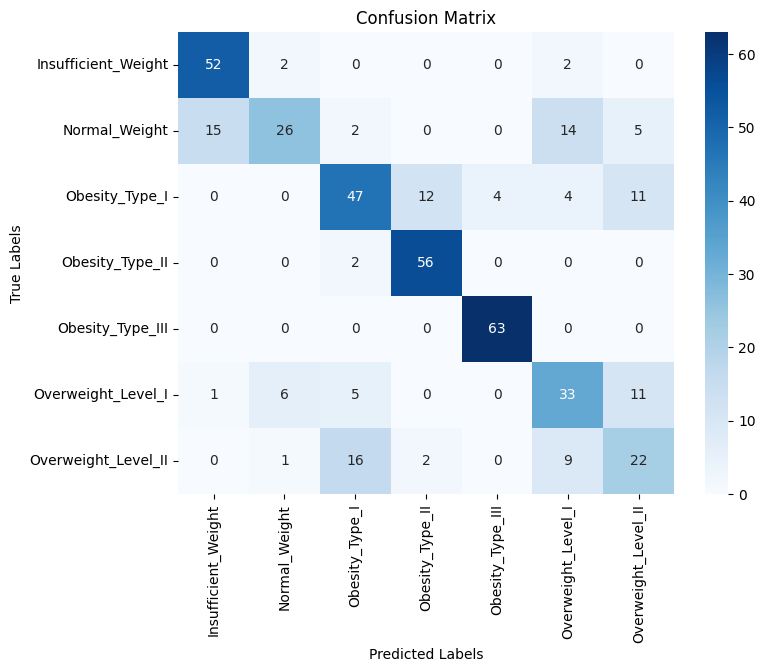

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming your data is loaded into 'df'

# --- Step 1: Encode categorical variables ---
# Binary columns: Label encode these (Gender, family_history_with_overweight, FAVC, SMOKE, SCC)
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
label_encoder = LabelEncoder()

# Label encoding for binary categorical features
for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding for non-ordinal categorical columns (CAEC, MTRANS, CALC)
df_encoded = pd.get_dummies(df, columns=['CAEC', 'MTRANS', 'CALC'], drop_first=True)

# --- Step 2: Encode the target column `NObeyesdad` ---
df_encoded['NObeyesdad'] = label_encoder.fit_transform(df_encoded['NObeyesdad'])

# --- Step 3: Split the data into training and testing sets ---
X = df_encoded.drop(columns=['NObeyesdad'])
y = df_encoded['NObeyesdad']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 4: Train the Logistic Regression model ---
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
logreg_model.fit(X_train, y_train)

# --- Step 5: Evaluate the model ---
# Predict on the test set
y_pred = logreg_model.predict(X_test)

# Accuracy Score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7069

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        56
           1       0.74      0.42      0.54        62
           2       0.65      0.60      0.63        78
           3       0.80      0.97      0.88        58
           4       0.94      1.00      0.97        63
           5       0.53      0.59      0.56        56
           6       0.45      0.44      0.44        50

    accuracy                           0.71       423
   macro avg       0.70      0.71      0.69       423
weighted avg       0.70      0.71      0.70       423


F1 Score (Macro Average): 0.6928
F1 Score (Weighted Average): 0.6961
F1 Score (Per Class): {0: 0.8387096774193549, 1: 0.5360824742268041, 2: 0.6266666666666667, 3: 0.875, 4: 0.9692307692307692, 5: 0.559322033898305, 6: 0.4444444444444444}


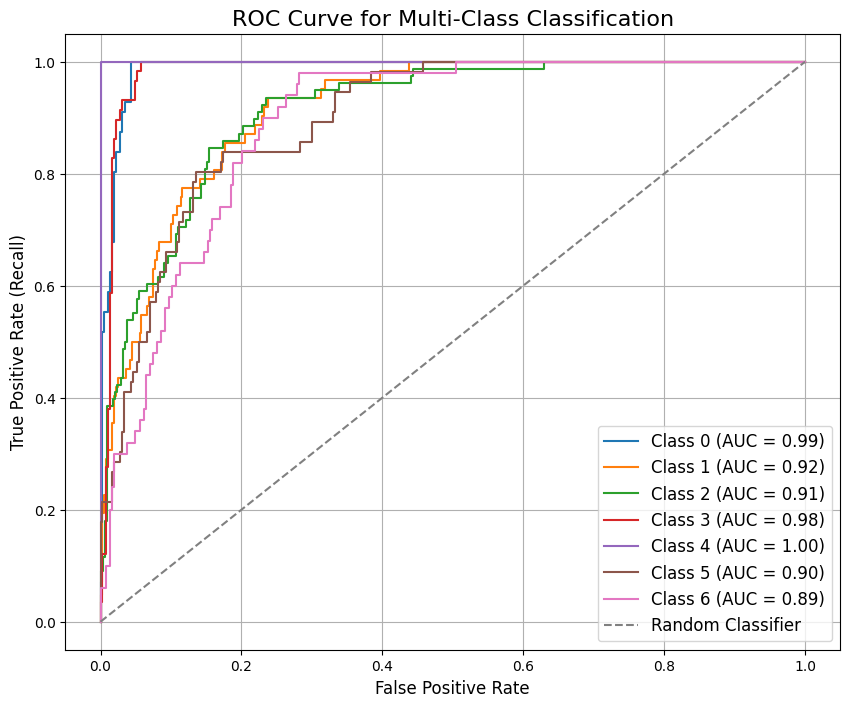

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import RocCurveDisplay

# Assuming your data is loaded into 'df'

# --- Step 1: Encode categorical variables ---
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
label_encoder = LabelEncoder()

# Label encoding for binary categorical features
for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding for non-ordinal categorical columns (CAEC, MTRANS, CALC)
df_encoded = pd.get_dummies(df, columns=['CAEC', 'MTRANS', 'CALC'], drop_first=True)

# --- Step 2: Encode the target column `NObeyesdad` ---
df_encoded['NObeyesdad'] = label_encoder.fit_transform(df_encoded['NObeyesdad'])

# --- Step 3: Split the data into training and testing sets ---
X = df_encoded.drop(columns=['NObeyesdad'])
y = df_encoded['NObeyesdad']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 4: Train the Logistic Regression model ---
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
logreg_model.fit(X_train, y_train)

# --- Step 5: Evaluate the model ---
y_pred = logreg_model.predict(X_test)

# Accuracy Score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

 #F1 Score (Macro, Weighted, and per class)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
f1_per_class = f1_score(y_test, y_pred, average=None)

print(f"\nF1 Score (Macro Average): {f1_macro:.4f}")
print(f"F1 Score (Weighted Average): {f1_weighted:.4f}")
print(f"F1 Score (Per Class): {dict(zip(label_encoder.classes_, f1_per_class))}")


# --- Step 6: Plot ROC curve for multi-class classification ---
# Binarize the output (for multi-class ROC)
y_test_bin = pd.get_dummies(y_test)
y_pred_prob = logreg_model.predict_proba(X_test)

# Generate ROC curve for each class
plt.figure(figsize=(10, 8))

# For each class (One-vs-Rest)
for i in range(y_test_bin.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_test_bin.iloc[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})")

# Plot ROC curve for a random chance
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Classifier")

# Customize the plot
plt.title("ROC Curve for Multi-Class Classification", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate (Recall)", fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()


## DBSCAN

In [ ]:
import random
def generate_reproducible_hex_colors(n):
    """
	Generate a list of n reproducible hex colors
    """
    random.seed(42)  # fixed seed
    return ["#{:06x}".format(random.randint(0, 0xFFFFFF)) for _ in range(n)]

def GridSearch(X, combo_grid):
    scores = []
    all_labels = []

    for i,(eps, min_samples) in enumerate(combo_grid):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        # dbscan.fit(X)
        labels = dbscan.labels_
        X["cluster"] = labels
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if -1 in labels_set:
            num_clusters -= 1
        if(num_clusters < 2) or (num_clusters > 10):
            scores.append(-20)
            all_labels.append("Poor")
            #    print("Processing iteration :", i, "eps = ",eps, "min_samples = ", min_samples, "loading...")
            continue
        scores.append(shs(X, labels))
        X.drop(columns=['cluster'], inplace=True)
        all_labels.append(labels)
        print("At iteration :", i, "eps = ",eps, "min_samples = ", min_samples, "score =", scores[-1],"Number of clusters = ", num_clusters,)

    best_index = np.argmax(scores)
    best_params = combo_grid[best_index]
    best_labels = all_labels[best_index]
    best_score = scores[best_index]
    return{
          'best_eps': best_params[0],
          'best_min_samples': best_params[1],
          'best_score': best_score,
          'best_labels': best_labels
    }, scores

In [ ]:
# Define hyperparameter ranges.
eps_values = np.arange(0.085, 0.13, 0.005)
min_samples = np.arange(24,55,1)

# 0 Data preprocessing
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)


# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

# 1 Dimensionality reduction


pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ["P1", "P2"]
# Evaluation of DBSCAN clusters using GridSearch silhoutte score function.

combo_grid = list(itertools.product(eps_values, min_samples))
best_parameters, scores = GridSearch(X_principal, combo_grid)
print(best_parameters)

At iteration : 0 eps =  0.085 min_samples =  24 score = 0.5542356134180589 Number of clusters =  4
At iteration : 1 eps =  0.085 min_samples =  25 score = 0.5545602012403238 Number of clusters =  4
At iteration : 2 eps =  0.085 min_samples =  26 score = 0.5541301229018004 Number of clusters =  4
At iteration : 3 eps =  0.085 min_samples =  27 score = 0.5720333878870975 Number of clusters =  4
At iteration : 4 eps =  0.085 min_samples =  28 score = 0.5666877061000732 Number of clusters =  3
At iteration : 5 eps =  0.085 min_samples =  29 score = 0.5655496476720167 Number of clusters =  3
At iteration : 6 eps =  0.085 min_samples =  30 score = 0.5644336724155806 Number of clusters =  3
At iteration : 7 eps =  0.085 min_samples =  31 score = 0.5631798733510232 Number of clusters =  3
At iteration : 8 eps =  0.085 min_samples =  32 score = 0.5733231124690128 Number of clusters =  4
At iteration : 9 eps =  0.085 min_samples =  33 score = 0.5718872293405226 Number of clusters =  4
At iterati

In [ ]:
# print number of points per cluster in best model
dbscan = DBSCAN(eps=0.095, min_samples=54)
dbscan.fit(X_principal)
labels = dbscan.labels_
X_principal["cluster"] = labels
shs(X_principal, labels)
X_principal["cluster"].value_counts()

0.7268741674082522

Text(0, 0.5, 'P2')

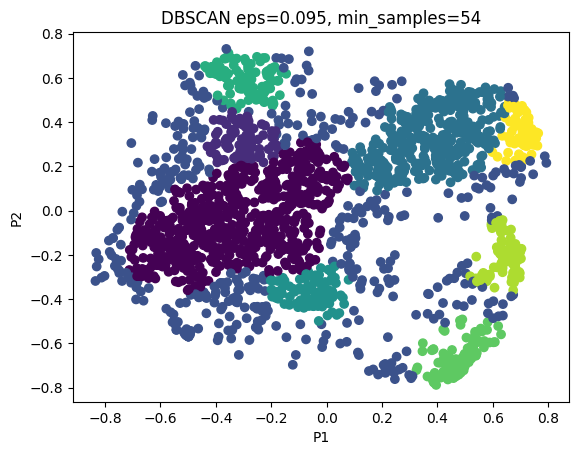

In [ ]:
# Visualize clusters
model = DBSCAN(eps=0.95, min_samples=54).fit(X_principal)
# visualize outputs
colors = model.labels_
plt.scatter(X_principal["P1"],X_principal["P2"], c=colors)
plt.title("DBSCAN eps=0.095, min_samples=54")
plt.xlabel("P1")
plt.ylabel("P2")

## KNN Model

In [ ]:
def train_test_knn(X_train, X_test, y_train, y_test, best_k, best_p):
  # --- Train and test best KNN model using best parameters ---

  # Define the best KNN model using the selected parameters.
  best_knn = KNeighborsClassifier(n_neighbors=int(best_k), metric='minkowski', p=best_p)
  best_knn.fit(X_train, y_train)

  # Predictions on the test set.
  y_test_pred = best_knn.predict(X_test)
  y_test_proba = best_knn.predict_proba(X_test)

  # Compute metrics.
  accuracy = accuracy_score(y_test, y_test_pred)
  conf_matrix = confusion_matrix(y_test, y_test_pred)
  classification_rep = classification_report(y_test, y_test_pred, output_dict=True)
  roc_auc = roc_auc_score(y_test, y_test_proba, multi_class='ovr')
  log_loss_value = log_loss(y_test, y_test_proba)

  # Display metrics.
  print(f"Test Accuracy: {accuracy:.4f}")
  print("\nConfusion Matrix:")
  print(conf_matrix)
  print("\nClassification Report:")
  for label, metrics in classification_rep.items():
      print(f"Class {label}: {metrics}")
  print(f"\nROC-AUC Score: {roc_auc:.4f}")
  print(f"Log Loss: {log_loss_value:.4f}")

  # Custom mapping key for classifications.
  nobeyesdad_mapping = {
      'Insufficient_Weight': 0,
      'Normal_Weight': 1,
      'Overweight_Level_I': 2,
      'Overweight_Level_II': 3,
      'Obesity_Type_I': 4,
      'Obesity_Type_II': 5,
      'Obesity_Type_III': 6
  }

  # Extract and sort the labels from the mapping
  custom_labels = [label for label, _ in sorted(nobeyesdad_mapping.items(), key=lambda x: x[1])]

  # Visualize Confusion Matrix.
  plt.figure(figsize=(10, 7))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=custom_labels, yticklabels=custom_labels)
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  plt.show()

  # --- Discover permutation feature importance ---

  # Perform permutation importance.
  perm_importance = permutation_importance(best_knn, X_test, y_test, scoring='accuracy')

  # Extract feature importance and sort.
  feature_importances = perm_importance.importances_mean
  feature_names = X_test.columns
  sorted_idx = feature_importances.argsort()

  # Plot feature importance.
  plt.figure(figsize=(10, 8))
  plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
  plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
  plt.xlabel("Mean Accuracy Decrease")
  plt.title("Feature Importance via Permutation")
  plt.show()

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

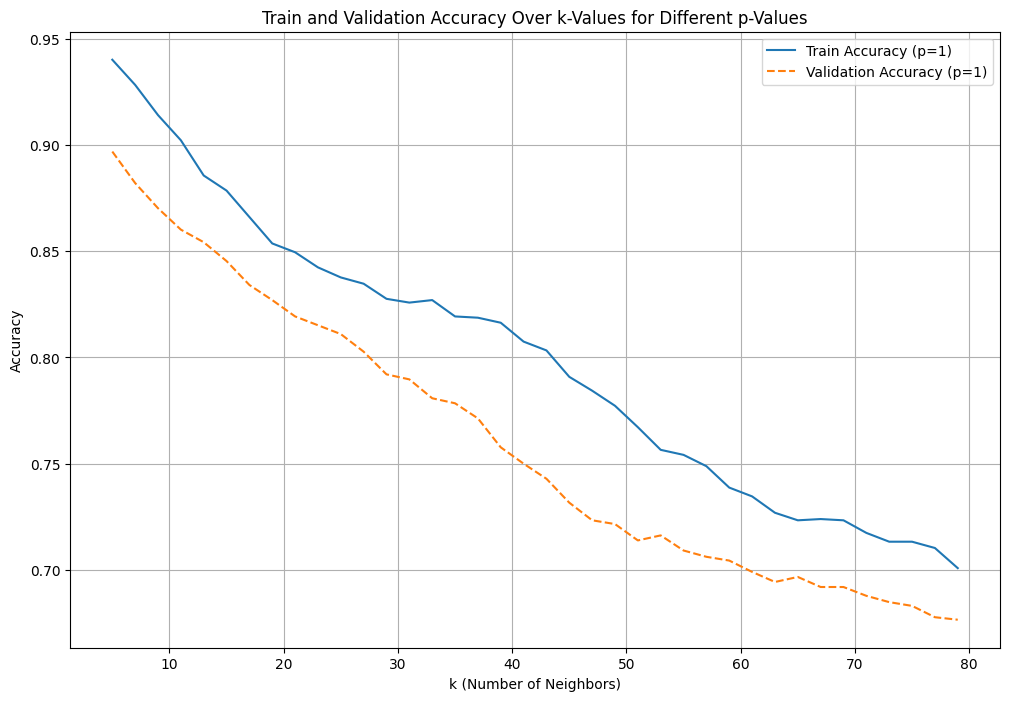

Test Accuracy: 0.9289

Confusion Matrix:
[[27  0  0  0  0  0  0]
 [ 2 22  4  1  0  0  0]
 [ 0  2 26  1  0  0  0]
 [ 0  0  0 26  3  0  0]
 [ 0  0  0  0 34  0  1]
 [ 0  0  0  0  1 29  0]
 [ 0  0  0  0  0  0 32]]

Classification Report:
Class 0: {'precision': 0.9310344827586207, 'recall': 1.0, 'f1-score': 0.9642857142857143, 'support': 27.0}
Class 1: {'precision': 0.9166666666666666, 'recall': 0.7586206896551724, 'f1-score': 0.8301886792452831, 'support': 29.0}
Class 2: {'precision': 0.8666666666666667, 'recall': 0.896551724137931, 'f1-score': 0.8813559322033898, 'support': 29.0}
Class 3: {'precision': 0.9285714285714286, 'recall': 0.896551724137931, 'f1-score': 0.9122807017543859, 'support': 29.0}
Class 4: {'precision': 0.8947368421052632, 'recall': 0.9714285714285714, 'f1-score': 0.9315068493150684, 'support': 35.0}
Class 5: {'precision': 1.0, 'recall': 0.9666666666666667, 'f1-score': 0.9830508474576272, 'support': 30.0}
Class 6: {'precision': 0.9696969696969697, 'recall': 1.0, 'f1-scor

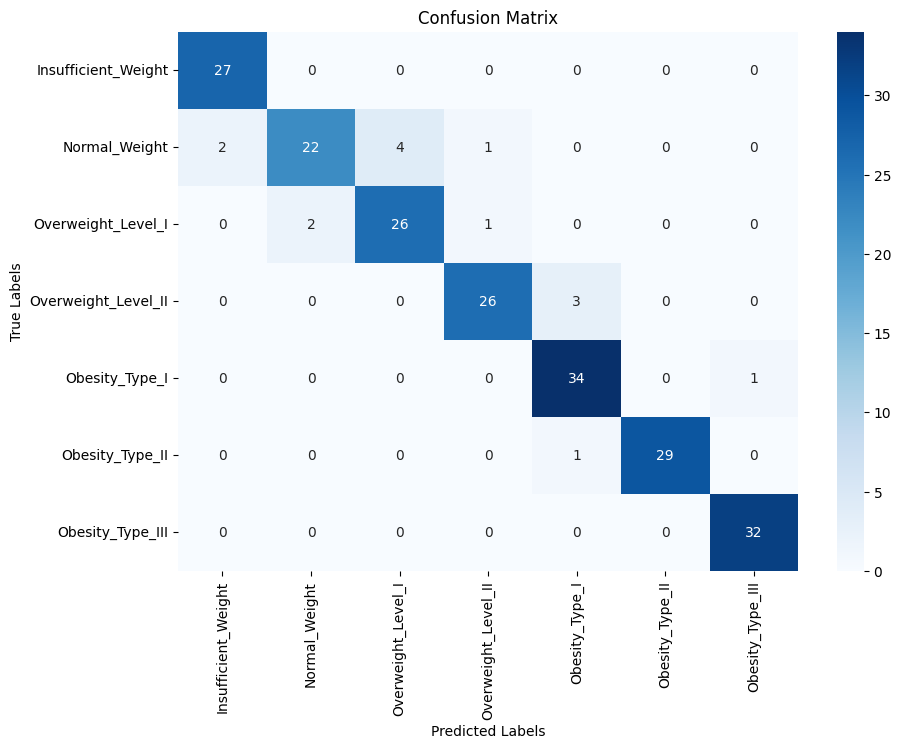

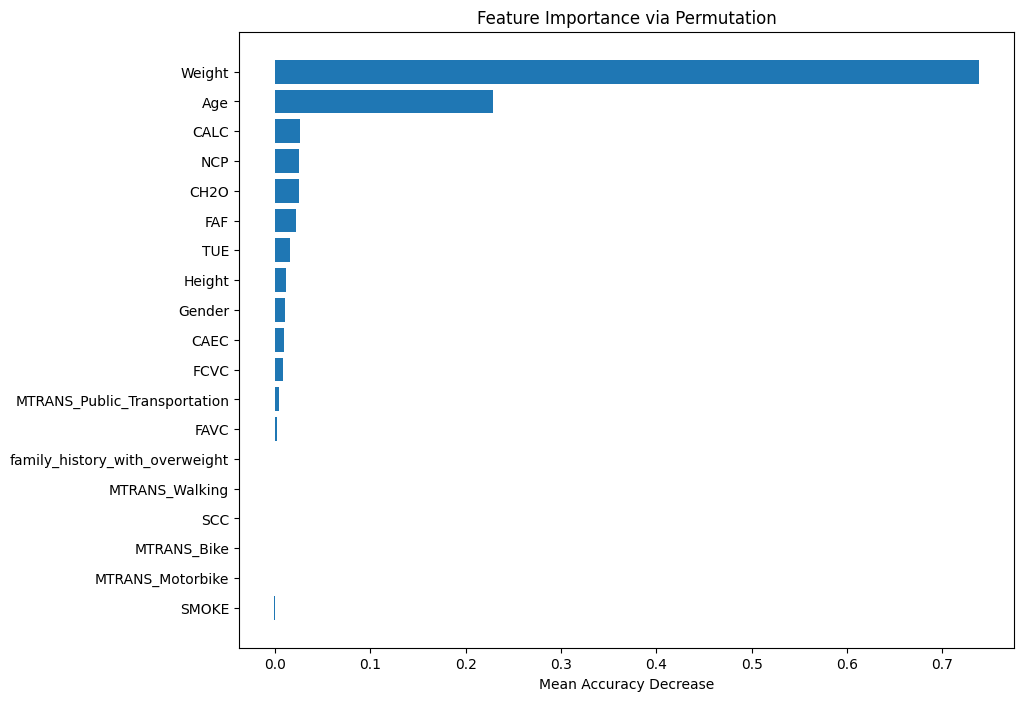

In [ ]:
# KNN Model - Classifier (using weight as a feature)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, RocCurveDisplay, roc_auc_score, log_loss
from sklearn.inspection import permutation_importance



# --- Load and encode data ---

# Assuming data is loaded into 'df'.
print(df)

# Create a copy of the DataFrame to avoid modifying the original.
df_encoded_KNN = df.copy()

# Label encode categorical and ordinal variables (Gender, family_history_with_overweight, FAVC, SMOKE, SCC, CAEC, CALC).
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'CAEC', 'CALC']
label_encoder = LabelEncoder()

# Placeholder to store the mapping.
encoding_legend = {}

# Encode each column and store the mapping.
for column in binary_columns:
    label_encoder = LabelEncoder()
    # Fit the encoder to the column.
    df_encoded_KNN[column] = label_encoder.fit_transform(df[column])
    # Store the mapping in a dictionary.
    encoding_legend[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the encoding legend.
print("Encoding Legend:")
for column, mapping in encoding_legend.items():
    print(f"{column}: {mapping}")

# One-Hot Encoding for non-ordinal categorical column MTRANS.
df_encoded_KNN = pd.get_dummies(df_encoded_KNN, columns=['MTRANS'], drop_first=True)

# Custom mapping for encoding so that 'Insufficient_Weight' is 0.
nobeyesdad_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

# Apply the mapping to encode the target column.
df_encoded_KNN['NObeyesdad'] = df_encoded_KNN['NObeyesdad'].map(nobeyesdad_mapping)

# Encode the target column `NObeyesdad`.
df_encoded_KNN['NObeyesdad'] = label_encoder.fit_transform(df_encoded_KNN['NObeyesdad'])

# Assuming the encoded dataset has the features and target separated into X_scaled and y_encoded.
X_scaled = df_encoded_KNN.drop(columns=['NObeyesdad'])  # Features.
y_encoded = df_encoded_KNN['NObeyesdad']  # Target.

# Split data: 80% training, 10% testing, 10% validation.
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)  # 80% training
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)  # 10% testing, 10% validation

# Display the sizes of each set.
split_info = {
    "Training Set": X_train.shape,
    "Testing Set": X_test.shape,
    "Validation Set": X_val.shape
}

# --- Test for best KNN parameters ---
#         Discover best combination of distance p value and K value to produce best performing KNN model.
#         Minkowski distance was selected because it works well with numeric and boolean features.

# Define parameters to test.
# Median K = 40 as sqrt of 1688 (size of training set) is ~ 41.
k_values = range(5, 80, 2)  # Odd k-values.
# p_values = [1, 1.5, 2, 3]  # Minkowski p-values.
p_values = [1]  # Minkowski p-values.

# Placeholder for results.
results = []

# Loop through combination of p and k values for parameters.
for k in k_values:
      for p in p_values:
          knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p)
          knn.fit(X_train, y_train)

          # Perform 5-fold cross-validation on training data.
          cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
          mean_cv_score = cv_scores.mean()  # Average validation accuracy across folds.

          train_acc = knn.score(X_train, y_train)
          results.append({'k': k, 'p': p, 'train_acc': train_acc, 'mean_val_acc': mean_cv_score})
          print(f"k={k}, p={p}, Train Accuracy={train_acc:.4f}, Validation Accuracy={mean_cv_score:.4f}")

# Convert results to a structured format for analysis.
results_df = pd.DataFrame(results)

# Identify the best combination based on validation accuracy and minimal training-validation gap.
results_df['gap'] = abs(results_df['train_acc'] - results_df['mean_val_acc'])
filtered_results_df = results_df[results_df['gap'] <= 0.05] # 0.05 threshold for acceptable gap between training and validation accuracy to combat overfitting.
best_row = filtered_results_df.loc[filtered_results_df['mean_val_acc'].idxmax()]  # Highest validation accuracy.
best_k = best_row['k']
best_p = best_row['p']
best_val_acc = best_row['mean_val_acc']
best_train_acc = best_row['train_acc']
gap = best_row['gap']

print("\nBest Parameters:")
print(f"k: {best_k}, p: {best_p}")
print(f"Train Accuracy: {best_train_acc:.4f}")
print(f"Validation Accuracy: {best_val_acc:.4f}")
print(f"Gap: {gap:.4f}")

# Line plot of validation and train accuracy for each p-value over k-values.
plt.figure(figsize=(12, 8))

# Loop through each unique p-value
for p in results_df['p'].unique():
    subset = results_df[results_df['p'] == p]

    # Plot train accuracy
    plt.plot(subset['k'], subset['train_acc'], label=f'Train Accuracy (p={p})', linestyle='solid')

    # Plot validation accuracy
    plt.plot(subset['k'], subset['mean_val_acc'], label=f'Validation Accuracy (p={p})', linestyle='dashed')

# Customize the plot
plt.title("Train and Validation Accuracy Over k-Values for Different p-Values")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

train_test_knn(X_train, X_test, y_train, y_test, best_k, best_p)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

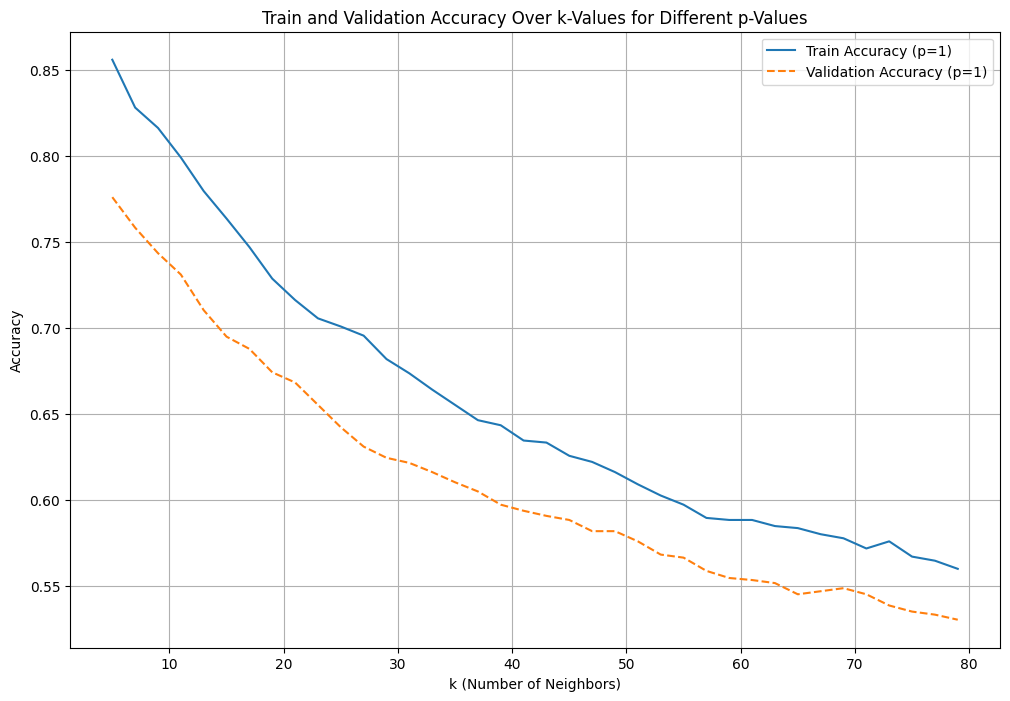

Test Accuracy: 0.6682

Confusion Matrix:
[[24  0  1  0  1  0  1]
 [ 4  7  8  2  3  4  1]
 [ 1  0 27  2  1  2  2]
 [ 0  0  1 29  0  0  0]
 [ 0  1  0  0 31  0  0]
 [ 1  1  7  1  5 12  2]
 [ 0  2  8  2  2  4 11]]

Classification Report:
Class 0: {'precision': 0.8, 'recall': 0.8888888888888888, 'f1-score': 0.8421052631578947, 'support': 27.0}
Class 1: {'precision': 0.6363636363636364, 'recall': 0.2413793103448276, 'f1-score': 0.35, 'support': 29.0}
Class 2: {'precision': 0.5192307692307693, 'recall': 0.7714285714285715, 'f1-score': 0.6206896551724138, 'support': 35.0}
Class 3: {'precision': 0.8055555555555556, 'recall': 0.9666666666666667, 'f1-score': 0.8787878787878788, 'support': 30.0}
Class 4: {'precision': 0.7209302325581395, 'recall': 0.96875, 'f1-score': 0.8266666666666667, 'support': 32.0}
Class 5: {'precision': 0.5454545454545454, 'recall': 0.41379310344827586, 'f1-score': 0.47058823529411764, 'support': 29.0}
Class 6: {'precision': 0.6470588235294118, 'recall': 0.3793103448275862,

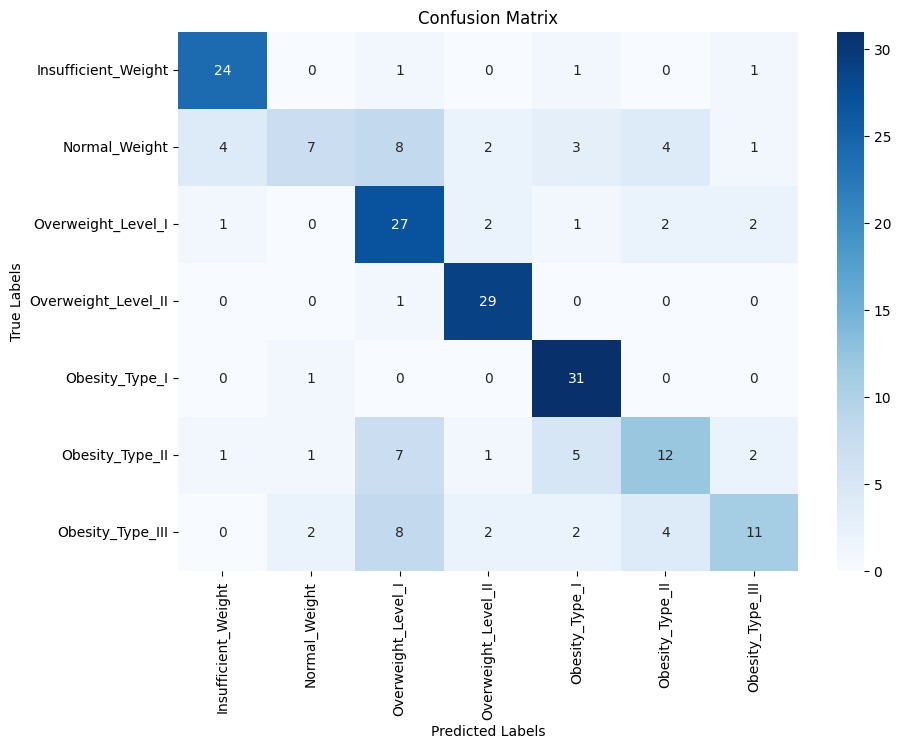

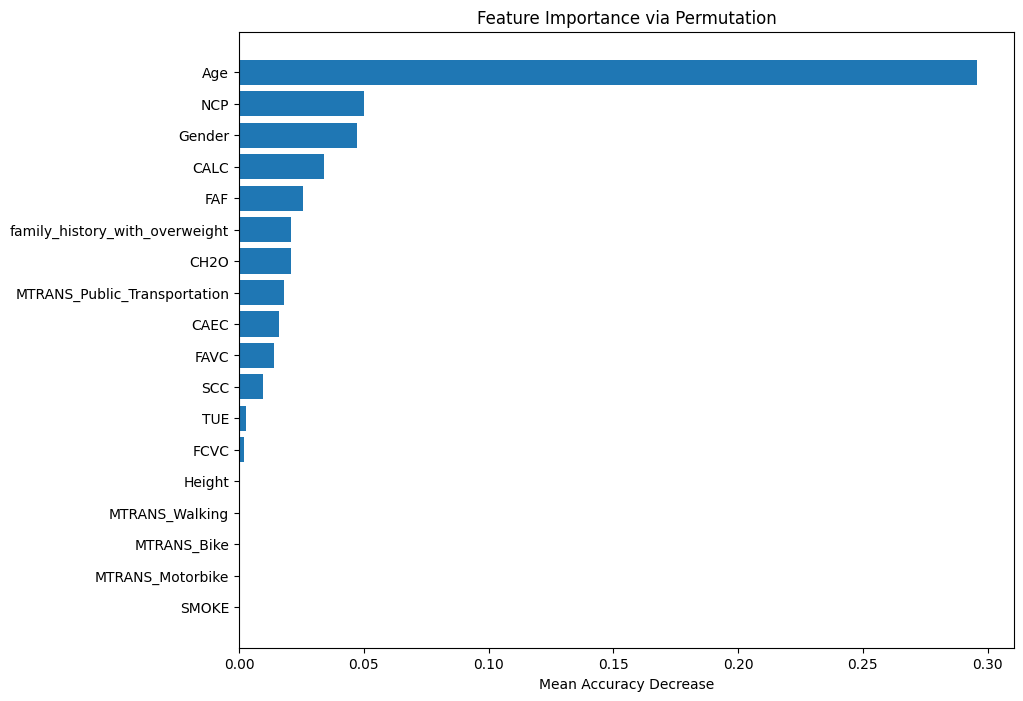

In [ ]:
# KNN Model - Classifier (excluding weight as a feature)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, RocCurveDisplay, roc_auc_score, log_loss
from sklearn.inspection import permutation_importance



# --- Load and encode data ---

# Assuming data is loaded into 'df'.
print(df)

# Create a copy of the DataFrame to avoid modifying the original.
df_encoded_KNN = df.copy()

# Excluding the weight feature from the data set.
df_encoded_KNN = df_encoded_KNN.drop(columns=['Weight'])

# Label encode categorical and ordinal variables (Gender, family_history_with_overweight, FAVC, SMOKE, SCC, CAEC, CALC).
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'CAEC', 'CALC']
label_encoder = LabelEncoder()

# Placeholder to store the mapping.
encoding_legend = {}

# Encode each column and store the mapping.
for column in binary_columns:
    label_encoder = LabelEncoder()
    # Fit the encoder to the column.
    df_encoded_KNN[column] = label_encoder.fit_transform(df[column])
    # Store the mapping in a dictionary.
    encoding_legend[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the encoding legend.
print("Encoding Legend:")
for column, mapping in encoding_legend.items():
    print(f"{column}: {mapping}")

# One-Hot Encoding for non-ordinal categorical column MTRANS.
df_encoded_KNN = pd.get_dummies(df_encoded_KNN, columns=['MTRANS'], drop_first=True)

# Encode the target column `NObeyesdad`.
df_encoded_KNN['NObeyesdad'] = label_encoder.fit_transform(df_encoded_KNN['NObeyesdad'])

# Assuming the encoded dataset has the features and target separated into X_scaled and y_encoded.
X_scaled = df_encoded_KNN.drop(columns=['NObeyesdad'])  # Features.
y_encoded = df_encoded_KNN['NObeyesdad']  # Target.

# Split data: 80% training, 10% testing, 10% validation.
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)  # 80% training
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)  # 10% testing, 10% validation

# Display the sizes of each set.
split_info = {
    "Training Set": X_train.shape,
    "Testing Set": X_test.shape,
    "Validation Set": X_val.shape
}

# --- Test for best KNN parameters ---
#         Discover best combination of distance p value and K value to produce best performing KNN model.
#         Minkowski distance was selected because it works well with numeric and boolean features.

# Define parameters to test.
# Median K = 40 as sqrt of 1688 (size of training set) is ~ 41.
k_values = range(5, 80, 2)  # Odd k-values.
# p_values = [1, 1.5, 2, 3]  # Minkowski p-values.
p_values = [1]  # Minkowski p-values.

# Placeholder for results.
results = []

# Loop through combination of p and k values for parameters.
for k in k_values:
      for p in p_values:
          knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p)
          knn.fit(X_train, y_train)

          # Perform 5-fold cross-validation on training data.
          cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
          mean_cv_score = cv_scores.mean()  # Average validation accuracy across folds.

          train_acc = knn.score(X_train, y_train)
          results.append({'k': k, 'p': p, 'train_acc': train_acc, 'mean_val_acc': mean_cv_score})
          print(f"k={k}, p={p}, Train Accuracy={train_acc:.4f}, Validation Accuracy={mean_cv_score:.4f}")

# Convert results to a structured format for analysis.
results_df = pd.DataFrame(results)

# Identify the best combination based on validation accuracy and minimal training-validation gap.
results_df['gap'] = abs(results_df['train_acc'] - results_df['mean_val_acc'])
filtered_results_df = results_df[results_df['gap'] <= 0.05] # 0.05 threshold for acceptable gap between training and validation accuracy to combat overfitting.
best_row = filtered_results_df.loc[filtered_results_df['mean_val_acc'].idxmax()]  # Highest validation accuracy.
best_k = best_row['k']
best_p = best_row['p']
best_val_acc = best_row['mean_val_acc']
best_train_acc = best_row['train_acc']
gap = best_row['gap']

print("\nBest Parameters:")
print(f"k: {best_k}, p: {best_p}")
print(f"Train Accuracy: {best_train_acc:.4f}")
print(f"Validation Accuracy: {best_val_acc:.4f}")
print(f"Gap: {gap:.4f}")

# Line plot of validation and train accuracy for each p-value over k-values.
plt.figure(figsize=(12, 8))

# Loop through each unique p-value
for p in results_df['p'].unique():
    subset = results_df[results_df['p'] == p]

    # Plot train accuracy
    plt.plot(subset['k'], subset['train_acc'], label=f'Train Accuracy (p={p})', linestyle='solid')

    # Plot validation accuracy
    plt.plot(subset['k'], subset['mean_val_acc'], label=f'Validation Accuracy (p={p})', linestyle='dashed')

# Customize the plot
plt.title("Train and Validation Accuracy Over k-Values for Different p-Values")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

train_test_knn(X_train, X_test, y_train, y_test, best_k, best_p)